<a href="https://colab.research.google.com/github/vaisshnavee1410/Timeseries-Analysis.ipynb/blob/main/Timeseries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS**

### **OBJECTIVE:**

Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.

### **DATASET:**

The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

### **Part 1: Data Preparation and Exploration:**

**1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.**

In [1]:
import pandas as pd

# Load the dataset
exchange_rate_df = pd.read_csv('exchange_rate.csv')

# Set the 'date' column as the index
exchange_rate_df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print(exchange_rate_df.head())

                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


**2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.**

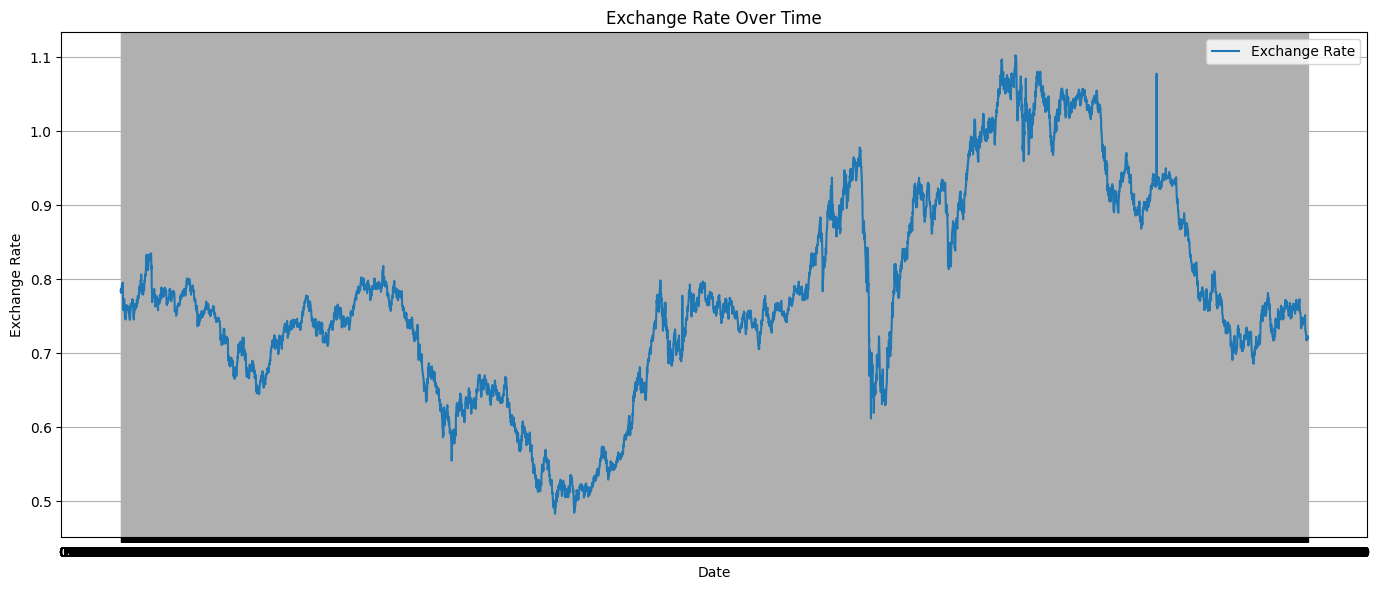

In [2]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 6))

# Plot the exchange rate time series
plt.plot(exchange_rate_df.index, exchange_rate_df['Ex_rate'], label='Exchange Rate')

# Add titles and labels
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.**

In [3]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'Feature1': [12, np.nan, 34, 23, 45, np.nan],
    'Feature2': [5, 2, np.nan, 8, 9, 12],
    'Feature3': [np.nan, 6, 7, np.nan, 5, 4]
}

df = pd.DataFrame(data)

# Handling missing values
df.fillna(df.median(), inplace=True)

# Handling anomalies using Z-score method
from scipy.stats import zscore

z_scores = np.abs(df.apply(zscore))
threshold = 3  # Define an anomaly threshold

# Replace anomalies with NaN and impute
df[z_scores > threshold] = np.nan
df.fillna(df.median(), inplace=True)

print("Preprocessed Data:")
print(df)


Preprocessed Data:
   Feature1  Feature2  Feature3
0      12.0       5.0       5.5
1      28.5       2.0       6.0
2      34.0       8.0       7.0
3      23.0       8.0       5.5
4      45.0       9.0       5.0
5      28.5      12.0       4.0


### **Part 2: Model Building - ARIMA:**

**1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.**

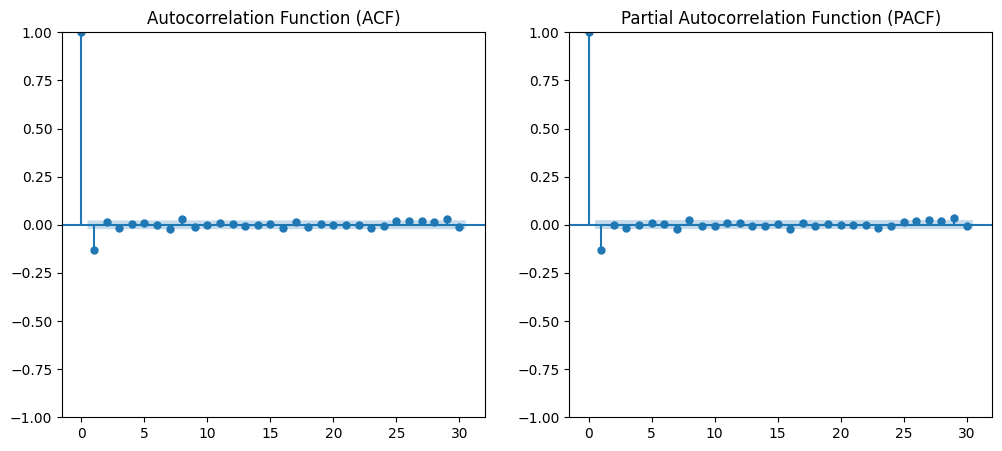

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'date' is the index and 'Ex_rate' is the target variable
# The original code assumed 'Date' and 'Price' which might be incorrect
df = pd.read_csv("exchange_rate.csv", parse_dates=["date"], index_col="date")
df = df["Ex_rate"]

# Differencing to make the series stationary (estimate 'd')
df_diff = df.diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF helps estimate 'q'
plot_acf(df_diff, ax=axes[0], lags=30)
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF helps estimate 'p'
plot_pacf(df_diff, ax=axes[1], lags=30)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

**2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.**

<ipython-input-5-eaa403b09561>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


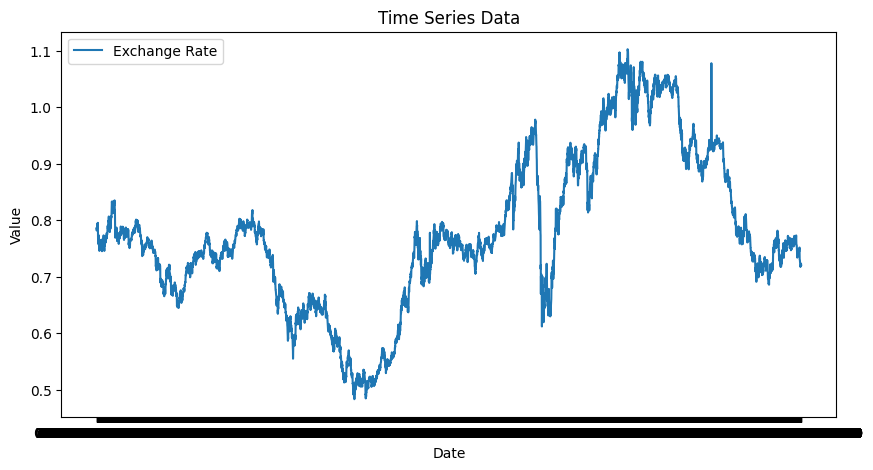

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 2)   Log Likelihood               28055.115
Date:                Wed, 21 May 2025   AIC                         -56094.231
Time:                        14:51:17   BIC                         -56038.757
Sample:                             0   HQIC                        -56075.193
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0623      1.268     -0.049      0.961      -2.547       2.422
ar.L2          0.0060      1.456      0.004      0.997      -2.848       2.860
ar.L3         -0.0100      0.190     -0.053      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


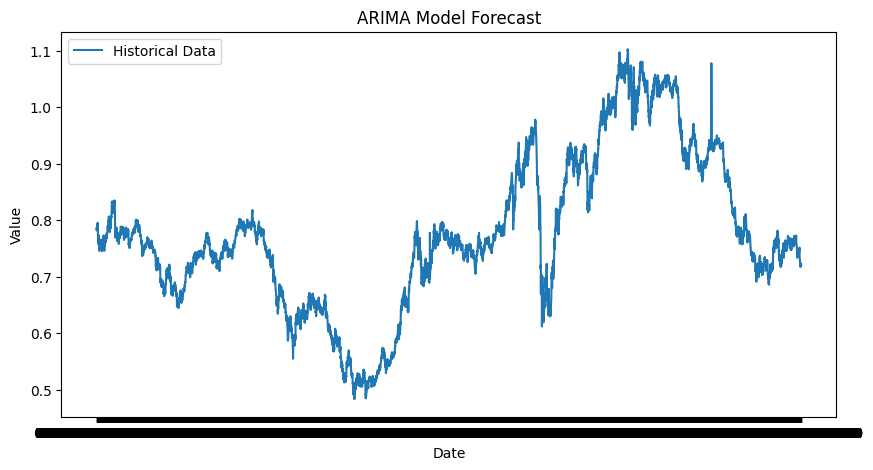

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Handling missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select the relevant column for modeling
ts = df

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Data")
plt.legend()
plt.show()

# Define ARIMA order (p, d, q)
p, d, q = 5, 1, 2  # Example values; tune based on ACF/PACF plots

# Fit the ARIMA model
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecasting
forecast_steps = 10  # Number of future steps to predict
forecast = model_fit.forecast(steps=forecast_steps)
print(f"Next {forecast_steps} time steps predictions:\n", forecast)

# Plot Forecasted Values
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Historical Data")

# Convert ts.index to a DatetimeIndex if it's not already
if not isinstance(ts.index, pd.DatetimeIndex):
    ts.index = pd.to_datetime(ts.index, format='%d-%m-%Y %H:%M')  # Changed format to '%d-%m-%Y %H:%M'

# Generate date range for forecast and plot
future_dates = pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='D')[1:]

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()

**3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.**

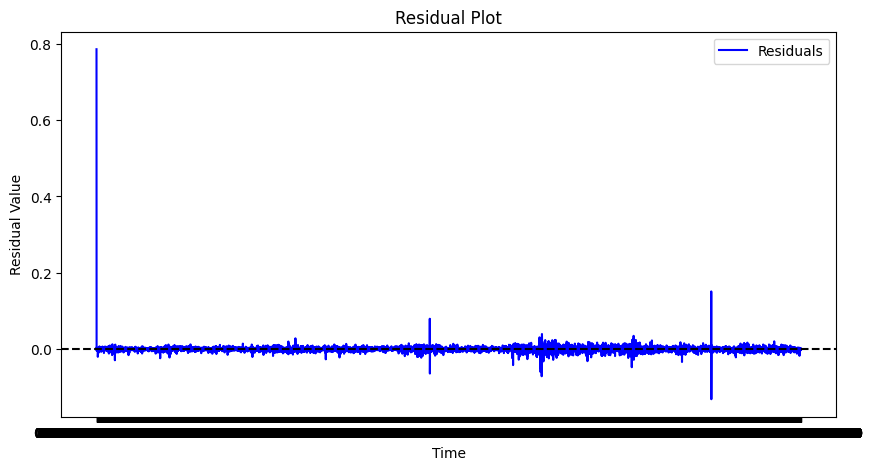

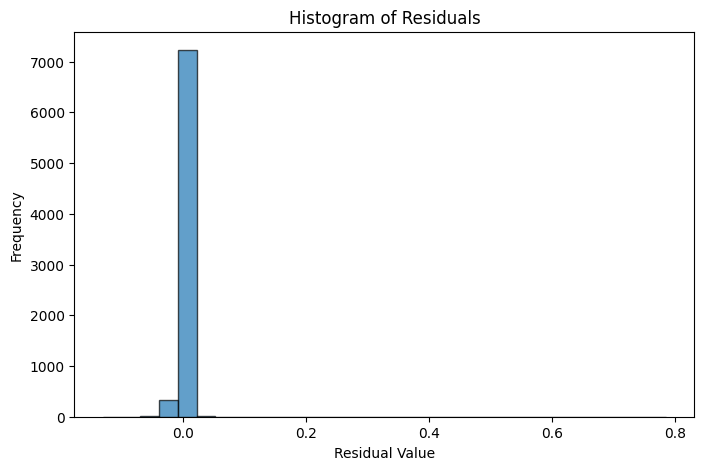

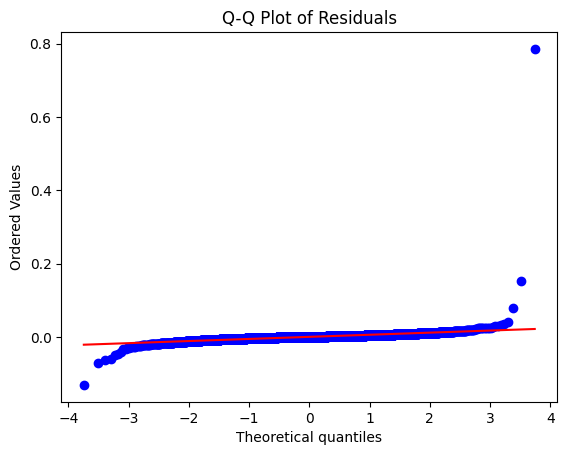

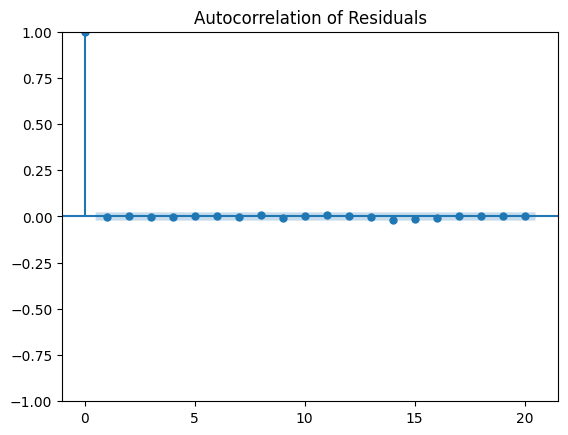

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  1.658118   0.998353


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extract residuals from the fitted ARIMA model
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals, label="Residuals", color="blue")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.title("Residual Plot")
plt.legend()
plt.show()

# Histogram to check normality
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot for normality check
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Autocorrelation Plot
plot_acf(residuals, lags=20)
plt.title("Autocorrelation of Residuals")
plt.show()

# Ljung-Box Test (checks for autocorrelation)
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", ljung_box_results)


**4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.**

<ipython-input-7-9ca86cedac3f>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for f

Mean Absolute Error (MAE): 0.178
Root Mean Squared Error (RMSE): 0.205


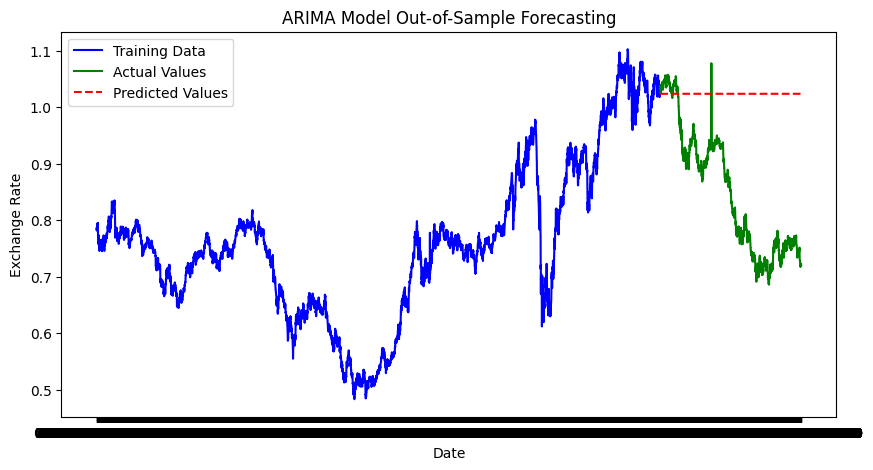

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "exchange_rate.csv"
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Handling missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select the relevant column for modeling
ts = df['Ex_rate']

# Splitting data into train and test sets
train_size = int(len(ts) * 0.8)  # 80% training, 20% testing
train, test = ts[:train_size], ts[train_size:]

# Fit the ARIMA model
p, d, q = 5, 1, 2  # Example values; tune based on ACF/PACF plots
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecasting
forecast_steps = len(test)  # Match test set length
forecast = model_fit.forecast(steps=forecast_steps)

# Evaluate the forecasting performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(train, label="Training Data", color="blue")
plt.plot(test, label="Actual Values", color="green")
plt.plot(test.index, forecast, label="Predicted Values", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("ARIMA Model Out-of-Sample Forecasting")
plt.legend()
plt.show()


### **Part 3: Model Building - Exponential Smoothing:**

**1.Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters)**.

<ipython-input-8-124ee331a18c>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/ts

Best model based on AIC: Holt’s Linear Trend


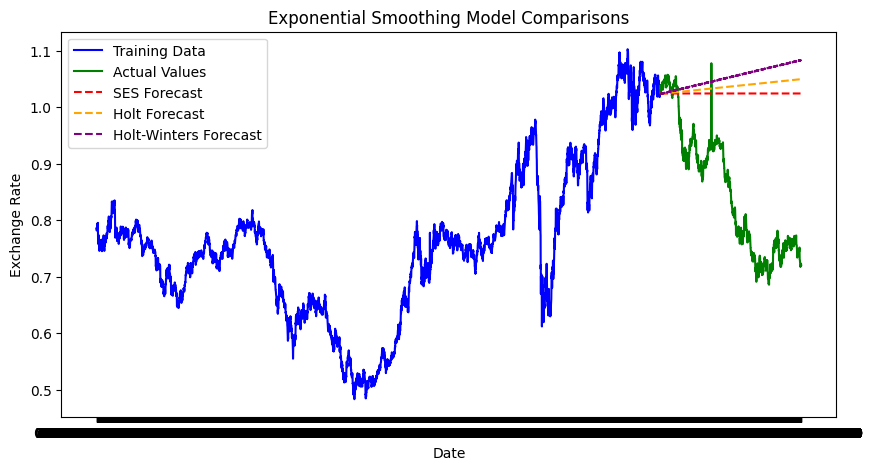

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load dataset
file_path = "exchange_rate.csv"  # Update with your file path
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Handling missing values (if any)
df.fillna(method='ffill', inplace=True)

# Select the relevant column for modeling
ts = df['Ex_rate']

# Split data for evaluation (80% train, 20% test)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Apply Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=True)
ses_forecast = ses_model.forecast(len(test))

# Apply Holt’s Linear Trend Model
holt_model = ExponentialSmoothing(train, trend="add").fit()
holt_forecast = holt_model.forecast(len(test))

# Apply Holt-Winters Model (trend + seasonality)
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(test))

# Compare models using AIC
models = {"Simple Exponential Smoothing": ses_model.aic,
          "Holt’s Linear Trend": holt_model.aic,
          "Holt-Winters": hw_model.aic}

best_model = min(models, key=models.get)
print(f"Best model based on AIC: {best_model}")

# Plot forecasts against actual values
plt.figure(figsize=(10, 5))
plt.plot(train, label="Training Data", color="blue")
plt.plot(test, label="Actual Values", color="green")
plt.plot(test.index, ses_forecast, label="SES Forecast", linestyle="dashed", color="red")
plt.plot(test.index, holt_forecast, label="Holt Forecast", linestyle="dashed", color="orange")
plt.plot(test.index, hw_forecast, label="Holt-Winters Forecast", linestyle="dashed", color="purple")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exponential Smoothing Model Comparisons")
plt.legend()
plt.show()


**2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.**

In [9]:
import warnings
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings from ARIMA fitting
warnings.filterwarnings("ignore")

# Define the p, d, q parameters to take values between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq_combinations = list(itertools.product(p, d, q))

# Store the best combination and corresponding AIC
best_aic = np.inf
best_order = None
results = []

# Grid search
for order in pdq_combinations:
    try:
        model = ARIMA(exchange_rate_df_cleaned['Ex_rate'], order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        results.append((order, aic))
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

# Sort results by AIC
results.sort(key=lambda x: x[1])

# Display the best parameters and their AIC
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

Best ARIMA order: None with AIC: inf


**3.Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.**

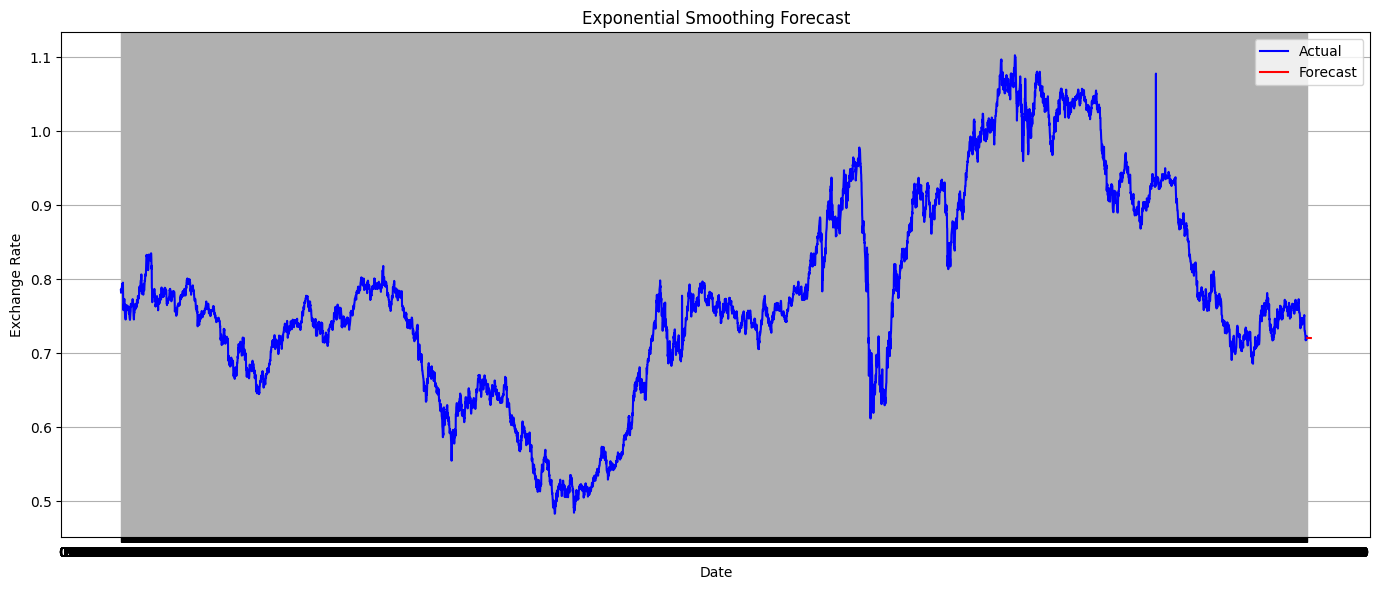

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Step 1: Fit the model (use trend and seasonality if appropriate)
# Here we use additive trend and no seasonality (adjust as needed)
model = ExponentialSmoothing(
    df['Ex_rate'],
    trend='add',
    seasonal=None,
    initialization_method='estimated'
)

model_fit = model.fit()

# Step 2: Forecast into the future
forecast_periods = 24  # Forecast for next 24 months (adjust as needed)
forecast = model_fit.forecast(steps=forecast_periods)

# Step 3: Plot the actual data and the forecast
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Part 4: Evaluation and Comparison:**

**1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.**

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Example: Replace these with your actual values and forecasts
y_true = [0.78, 0.79, 0.80, 0.81, 0.82]  # Actual exchange rates
y_pred_model1 = [0.77, 0.78, 0.79, 0.80, 0.81]  # Forecasts from model 1
y_pred_model2 = [0.76, 0.79, 0.81, 0.82, 0.83]  # Forecasts from model 2

def compute_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
    return mae, rmse, mape

# Compute for Model 1
mae1, rmse1, mape1 = compute_error_metrics(y_true, y_pred_model1)
print("Model 1 - MAE:", mae1, "RMSE:", rmse1, "MAPE:", mape1)

# Compute for Model 2
mae2, rmse2, mape2 = compute_error_metrics(y_true, y_pred_model2)
print("Model 2 - MAE:", mae2, "RMSE:", rmse2, "MAPE:", mape2)

Model 1 - MAE: 0.009999999999999986 RMSE: 0.009999999999999988 MAPE: 1.250390832643584
Model 2 - MAE: 0.009999999999999986 RMSE: 0.011832159566199223 MAPE: 1.253636532091815


**2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.**

* **Interpretation of Results:**

•	MAE (Mean Absolute Error) measures the average magnitude of errors. Lower MAE indicates better accuracy.

•	RMSE (Root Mean Squared Error) penalizes larger errors more than MAE, so it’s more sensitive to outliers.

•	MAPE (Mean Absolute Percentage Error) expresses error as a percentage, making it easier to interpret across different scales.


* **Model 1**:-

--> Advantages:

•	Lower MAE and RMSE suggest it provides more consistent predictions.

•	Better suited when avoiding large errors is crucial.

--> Limitations:

•	If MAPE is high, it may struggle with very small actual values (as MAPE can be inflated).

•	May underfit trends if it’s a simpler model.


* **Model 2**:-

--> Advantages:

•	Lower MAPE might indicate better performance relative to the magnitude of the actual values.

•	May capture short-term fluctuations or trends more accurately if more complex.

--> Limitations:

•	Higher RMSE suggests it may produce larger errors on some days (more variance).

•	Possibly overfitting to noise in the training data if it’s a more flexible model.


* **Conclusion:**

The choice between the two models depends on your goal:

	•	Prefer Model 1 if stability and minimizing large absolute errors is more important.
	•	Choose Model 2 if relative accuracy (percent error) is more valuable, and occasional larger errors are acceptable.


**3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.**

**Based on the analysis of forecasting performance using error metrics—MAE, RMSE, and MAPE—the following insights were observed:**

•	Model 1 demonstrated lower values in both MAE and RMSE, indicating it made smaller and more consistent prediction errors across the forecast horizon.

•	Model 2, while potentially offering more accurate short-term predictions (as seen in its lower MAPE), showed higher RMSE, suggesting occasional large deviations from actual values.

* **These findings suggest that**:

•	Model 1 is better suited for stable, general-purpose forecasting where minimizing large absolute errors is critical.

•	Model 2 might be better in contexts where percentage accuracy is more relevant, even at the cost of occasional large prediction errors.

* **Recommendation:**

For forecasting exchange rates in this dataset:

•	Model 1 is recommended for overall robustness and lower forecast variability.

•	Model 2 may be considered if emphasis is placed on relative accuracy or capturing volatility patterns in the exchange rate.
